In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(70)
data_x = np.linspace(-10.0, 10.0, 100)[:,np.newaxis]
data_y = 29* data_x + 20* np.random.randn(100,1) # Creating the data
data_x /= np.max(data_x) # scaling : -1 to 1
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [3]:
# Creating X0 as 1 for the matrix multoplication for [w0, 
#                                                    w1]
# h(w) = w1.x1 + w0.x0
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [5]:
# Train-Test Split
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(order)
print(test_x.shape, test_y.shape, train_x.shape, train_y.shape)
print(test_x)

[ 2 98 75 60 17 79  3 20  4 47 80 59 95 12 11 21 29 15 46 84 40 56 88 22
 90 68 10 14 34 53 33 61 52 63 49 19 87 26 66 94 48 77 36  6 85 27 70 24
 55 38 71  1 18 43 30 74 86 67 96 65 89 51 82 83 32 92 72 57 78 31 23 28
 64 93 45 50 69 62 25 76  7 91  0 37  9 44 42 73  8 97 99 35 13  5 81 58
 41 54 39 16]
(20, 2) (20, 1) (80, 2) (80, 1)
[[ 1.         -0.95959596]
 [ 1.          0.97979798]
 [ 1.          0.51515152]
 [ 1.          0.21212121]
 [ 1.         -0.65656566]
 [ 1.          0.5959596 ]
 [ 1.         -0.93939394]
 [ 1.         -0.5959596 ]
 [ 1.         -0.91919192]
 [ 1.         -0.05050505]
 [ 1.          0.61616162]
 [ 1.          0.19191919]
 [ 1.          0.91919192]
 [ 1.         -0.75757576]
 [ 1.         -0.77777778]
 [ 1.         -0.57575758]
 [ 1.         -0.41414141]
 [ 1.         -0.6969697 ]
 [ 1.         -0.07070707]
 [ 1.          0.6969697 ]]


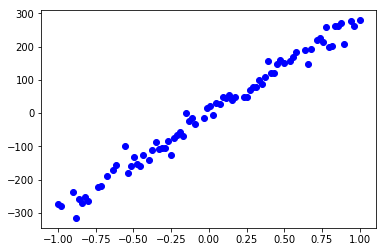

In [6]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [16]:
# Cost Function
def get_gradient(w, x, y):
    y_estimate = (x.dot(w)).flatten() #hypethesis := x1.w1 + x0.w0
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x)) * np.sum(np.power(error,2)) # MSE : Loss Function
    gradient = -(1.0/len(x)) * error.dot(x) # Gradient
    return gradient, mse

In [20]:
# Training the data
w = np.random.randn(2)
alpha = 0.25 # Learning Rate
tolerance = 1e-3 # 10**-3 = 0.001
print('Initial values of weights:')
print(w[0], w[1])

# Perform Gradient Descent
iterations = 1

while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient # Gradient Descent step
    #print(f'Gradient: {gradient}')
    
    # Stopping condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Converged')
        break
        
    # Print Error every 10 Iterations
    if iterations % 10 == 0:
        print(f'Iteration: {iterations} Error: {error}')
        print('Updated weights: {:f}, {:f}'.format(w[1], w[0]))
        
    iterations += 1
    w = new_w
    
print('Final Weights: {:f} {:f}'.format(w[1], w[0]))
print('Test Cost = ', get_gradient(w, test_x, test_y)[1])


Initial values of weights:
1.3697517250708136 -0.16282800079018311
Iteration: 10 Error: 6662.052495204633
Updated weights: 151.568989, 3.991559
Iteration: 20 Error: 1688.4735101295091
Updated weights: 229.867078, 0.937720
Iteration: 30 Error: 704.0262590089172
Updated weights: 264.689641, -0.717369
Iteration: 40 Error: 509.14456849834744
Updated weights: 280.182365, -1.470361
Iteration: 50 Error: 470.56560991330934
Updated weights: 287.075466, -1.806319
Iteration: 60 Error: 462.9284835672221
Updated weights: 290.142397, -1.955847
Iteration: 70 Error: 461.4166309668723
Updated weights: 291.506961, -2.022380
Iteration: 80 Error: 461.11734322674306
Updated weights: 292.114093, -2.051982
Iteration: 90 Error: 461.05809594868765
Updated weights: 292.384223, -2.065153
Iteration: 100 Error: 461.0463673026847
Updated weights: 292.504412, -2.071013
Iteration: 110 Error: 461.0440454890661
Updated weights: 292.557887, -2.073621
Iteration: 120 Error: 461.04358586069304
Updated weights: 292.581680, 

In [22]:
print('Final Equation/ Hypothesis look like:')
print('y = {:f}.x + {:f}'.format(w[1], w[0]))

Final Equation/ Hypothesis look like:
y = 292.589019.x + -2.075138


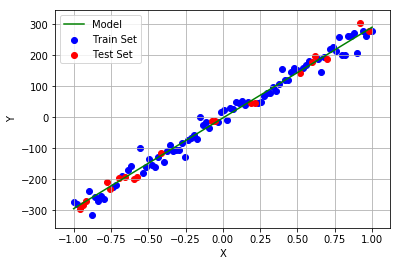

In [23]:
# Plotting the values

plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()